# Introduction

Diabetes is one of the most prevalent chronic diseases globally, affecting millions of people. Early diagnosis and timely intervention are crucial in managing and preventing complications associated with diabetes. Machine learning techniques offer powerful tools to analyze medical data and predict the likelihood of diabetes, enabling healthcare professionals to make informed decisions for patient care.

In this project, we utilize a dataset containing various medical features related to diabetes, such as Glucose level, BMI, Blood Pressure, and more, to build predictive models. By applying different machine learning algorithms, including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, and others, we aim to classify individuals into two categories: those who are likely to develop diabetes and those who are not.

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv('Diabetes_data.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive
766,1,126,60,0,0,30.1,0.349,47,dead


In [107]:
df.columns


Index([             'Pregnancies',                  'Glucose',
                  'BloodPressure',            'SkinThickness',
                        'Insulin',                      'BMI',
       'DiabetesPedigreeFunction',                      'Age',
                        'Outcome',              'new_Outcome',
                                1,                          0],
      dtype='object')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive
766,1,126,60,0,0,30.1,0.349,47,dead
767,1,93,70,31,0,30.4,0.315,23,alive


Data Preprocessing:

Check for missing or duplicate values.

Convert data types where necessary for numerical analysis.

Address outliers if any exist.

check information about data.

check missing values and replace it with specified value.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
df.fillna(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive
766,1,126,60,0,0,30.1,0.349,47,dead


In [10]:
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive
766,1,126,60,0,0,30.1,0.349,47,dead


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [12]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
numerical_df=df.select_dtypes(include=['int64','float64'])
categorical_df=df.select_dtypes(include=['object','category'])

In [14]:
numerical_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
categorical_df.describe()

,Outcome
count,768
unique,2
top,alive
freq,500


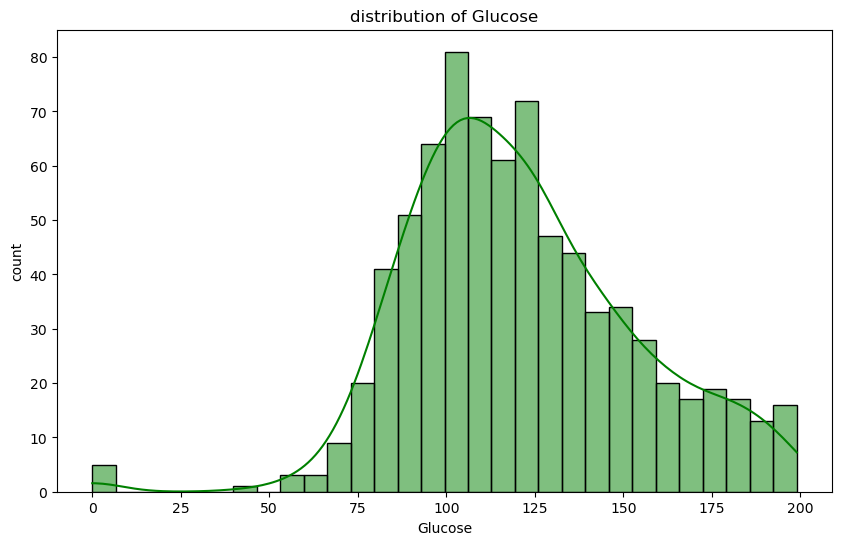

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='green')
plt.title('distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('count')
plt.show() 

The histogram provides a visual representation of the distribution of glucose levels in the dataset.

It suggests that most individuals have glucose levels around the mean, with fewer individuals having very low or very high glucose levels.

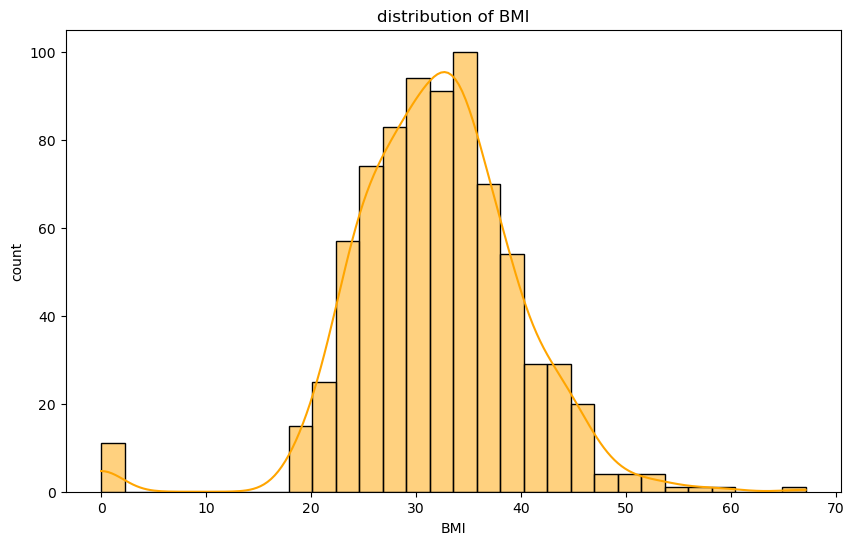

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='orange')
plt.title('distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('count')
plt.show() 

The histogram suggests that most people in the dataset have lower BMI, with a smaller group having high BMI values (indicative of overweight or obesity).

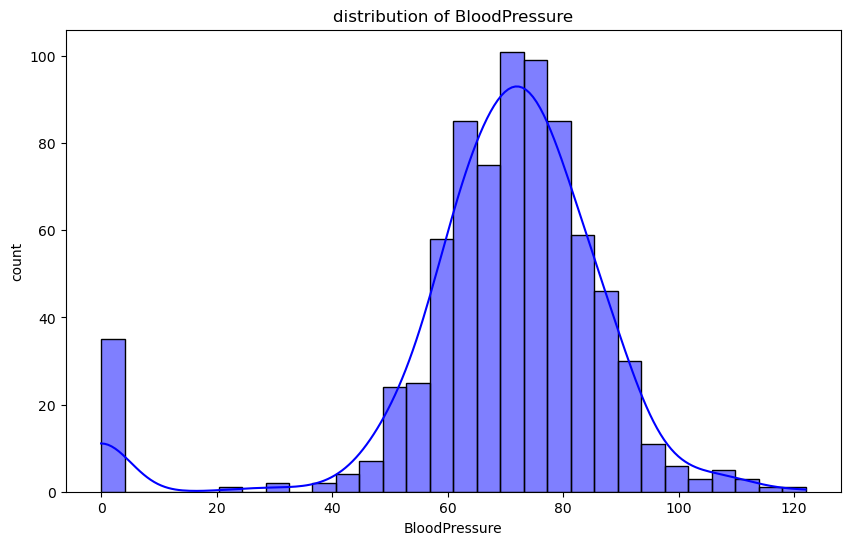

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BloodPressure'], bins=30, kde=True, color='blue')
plt.title('distribution of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('count')
plt.show() 

The histogram will show how Blood Pressure values are distributed within the dataset.

A normal (bell-shaped) distribution suggests that most individuals have a blood pressure around the average, with fewer people having either low or high blood pressure.

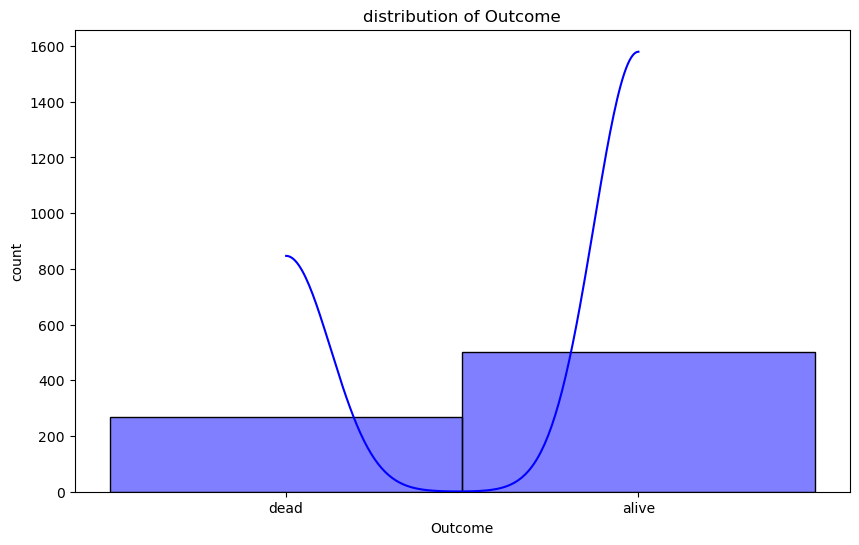

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Outcome'], bins=30, kde=True, color='blue')
plt.title('distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('count')
plt.show() 

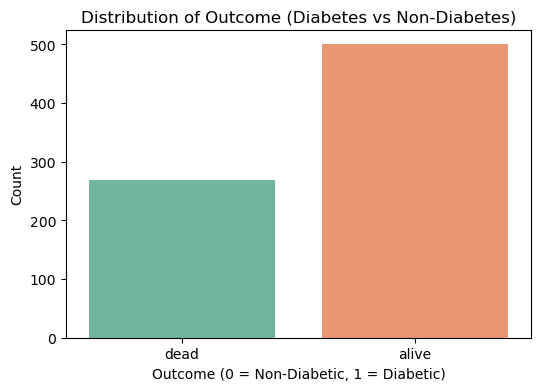

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')  
plt.title('Distribution of Outcome (Diabetes vs Non-Diabetes)')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

This plot shows the number of individuals who are diabetic (Outcome = 1) versus those who are non-diabetic (Outcome =0)

# Label Encoding

Converts categorical data into integers.

Each unique category is assigned an integer value.

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df['Outcome'].unique()

array(['dead', 'alive'], dtype=object)

In [23]:
#instance of labelencoder
LE=LabelEncoder()
df['Outcome']=LE.fit_transform(df['Outcome'])

In [24]:
df['Outcome'].unique()

array([1, 0])

#  Onehot Encoding

 Converts categorical data into a binary matrix representation.

 Each category is converted into a new binary column where a value of 1 indicates the presence of that category, and 0 indicates its absence.

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
#converting type of column to category
df['Outcome'] = df['Outcome'].astype('category')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
#Assigning numerical values and storing it into another columns
df['new_Outcome']=df['Outcome'].cat.codes
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,new_Outcome
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


In [28]:
#Create an instance of one-hot-encoder
OHEnc=OneHotEncoder()

In [29]:
ohedf=OHEnc.fit_transform(df[['Outcome']]).toarray()
ohedf

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [30]:
OHE_df=pd.DataFrame(ohedf,columns=df.Outcome.unique())
OHE_df

,1,0
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
763,1.0,0.0
764,1.0,0.0
765,1.0,0.0
766,0.0,1.0


In [31]:
df['Outcome'].unique()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,new_Outcome
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


In [32]:
df=pd.concat([df,OHE_df],axis= "columns")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,new_Outcome,1,0
0,6,148,72,35,0,33.6,0.627,50,1,1,0.0,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0,1.0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1,0.0,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0,1.0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,1.0,0.0
764,2,122,70,27,0,36.8,0.340,27,0,0,1.0,0.0
765,5,121,72,23,112,26.2,0.245,30,0,0,1.0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,1,0.0,1.0


# Multiple Linear Regression

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.


How strong the relationship is between two or more independent variables and one dependent variable.

The value of the dependent variable at a certain value of the independent variables.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Creating Input and Output Variables
input = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [35]:
output = df[['Outcome']]
output

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [36]:
# Instance of Linear Regression Model
model = LinearRegression()

In [37]:
# Fitting Data in Model
model.fit(input, output)

LinearRegression()

In [38]:
print("Slope = ", model.coef_)

Slope =  [[ 0.02059187  0.00592027 -0.00233188  0.00015452 -0.00018053  0.01324403
   0.14723744  0.00262139]]


In [39]:
print("Y_intercept = ", model.intercept_)

Y_intercept =  [-0.85389427]


In [40]:
# Prediction Using Model
model.predict([[3,155,150,150,56,100,150,180],[1,105,85,100,150,45,120,50]])  

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[23.67067967],
       [17.97403209]])

In [41]:
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score

In [42]:
print(df.columns)

Index([             'Pregnancies',                  'Glucose',
                  'BloodPressure',            'SkinThickness',
                        'Insulin',                      'BMI',
       'DiabetesPedigreeFunction',                      'Age',
                        'Outcome',              'new_Outcome',
                                1,                          0],
      dtype='object')


In [43]:
X=[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
print(X)

[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]


In [44]:
y=df[["Outcome"]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# Multiple logistic regression

 It is used when the dependent variable is binary (e.g., 0 or 1, "yes" or "no") and there are multiple independent variables
 
 

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [46]:
#Load the digit dataset
digits=load_digits()

In [47]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 640x480 with 0 Axes>

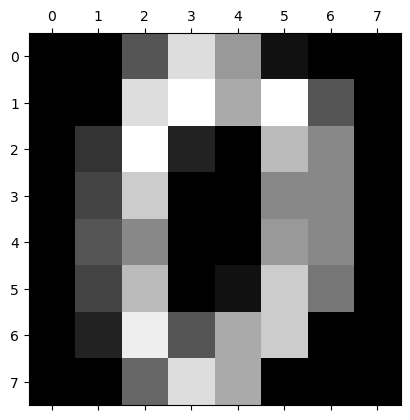

In [48]:
plt.gray()
plt.matshow(digits.images[0])

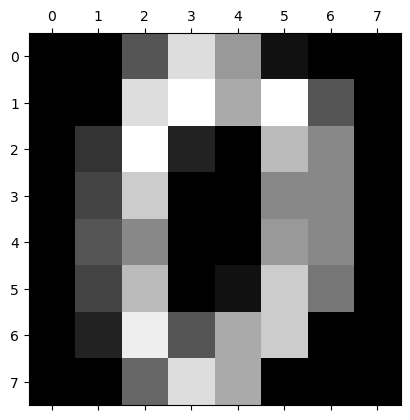

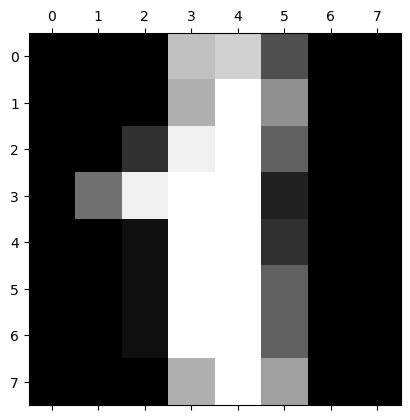

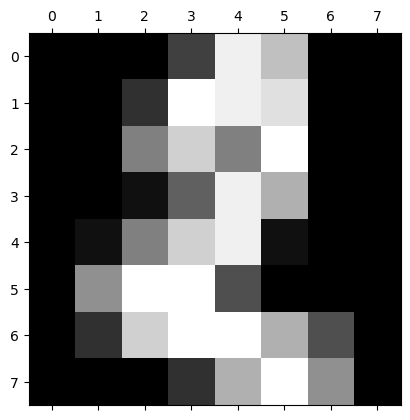

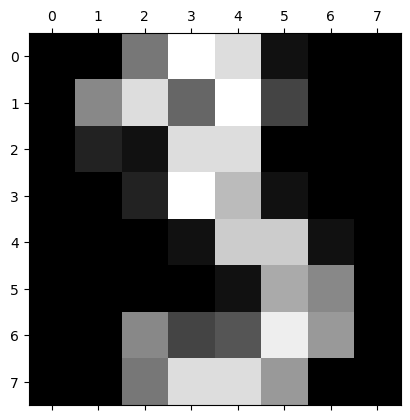

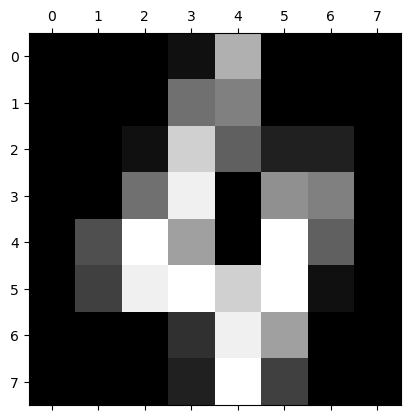

In [49]:
for i in range (5):
    plt.matshow(digits.images[i])

In [50]:
#defining features matrix(x) and response vector (y)
x= digits.data
y=digits.target

In [51]:
#spliting x and y into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [52]:
#create logistic regression object
reg=LogisticRegression()

In [53]:
#train the model using the training sets
reg.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
#making prediction on testing sets
y_pred=reg.predict(x_test)
y_pred

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 4,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       1, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 3, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 9, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 5, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 8, 5, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [55]:
len(y_test)

360

In [56]:
#comparing actual response values (y_test) with predicted response value (y_pred)
print("Logistic Regression model accuracy(in %):",accuracy_score(y_test,y_pred)*100)

Logistic Regression model accuracy(in %): 96.94444444444444


In [57]:
cm= confusion_matrix(y_pred,y_test)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  1,  0,  0],
       [ 1,  1,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 33]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

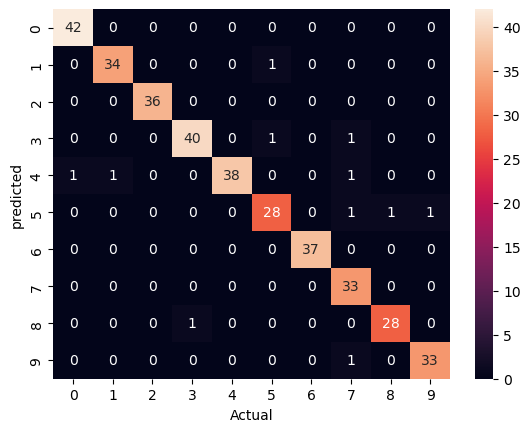

In [58]:
#visual
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show

In [59]:
(42+34+36+40+38+28+37+33+28+33)/360

0.9694444444444444

# Decision tree classifier

The decision tree plot provides a clear, visual explanation of how decisions are made. It shows the splits at each node, making 
it easy to understand the model’s decision-making process.

This can be helpful for communicating the results to non-technical stakeholders, such as healthcare professionals, as it allows for transparent model explanations.


In [60]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree

In [61]:
from sklearn import metrics

In [62]:
# creating instance of model
DTC_model= DecisionTreeClassifier()

In [63]:
DTC_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
#check accuracy 
DTC_model.score(x_test,y_test)

0.8527777777777777

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<Axes: >

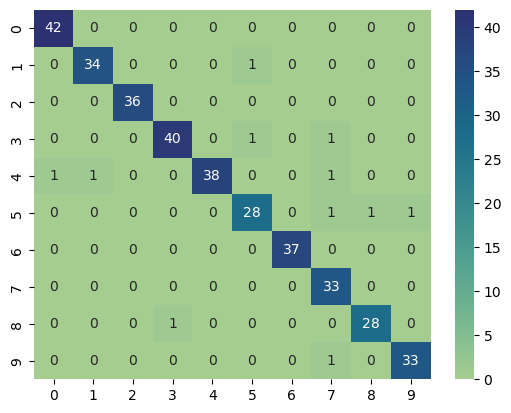

In [66]:
#plotting heatmap
sns.heatmap(cm, annot = True , cmap = "crest")

[Text(0.2858475245786517, 0.9583333333333334, 'x[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [135, 147, 141, 142, 143, 152, 144, 142, 145, 146]'),
 Text(0.05547752808988764, 0.875, 'x[42] <= 5.0\ngini = 0.553\nsamples = 213\nvalue = [133, 0, 2, 0, 3, 23, 4, 0, 3, 45]'),
 Text(0.028089887640449437, 0.7916666666666666, 'x[21] <= 7.0\ngini = 0.421\nsamples = 62\nvalue = [0, 0, 1, 0, 0, 17, 0, 0, 0, 44]'),
 Text(0.016853932584269662, 0.7083333333333334, 'x[4] <= 8.0\ngini = 0.204\nsamples = 18\nvalue = [0, 0, 1, 0, 0, 16, 0, 0, 0, 1]'),
 Text(0.011235955056179775, 0.625, 'x[62] <= 6.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.0056179775280898875, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.016853932584269662, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.02247191011235955, 0.625, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 0, 0, 16, 0, 0, 0, 0]'),
 Te

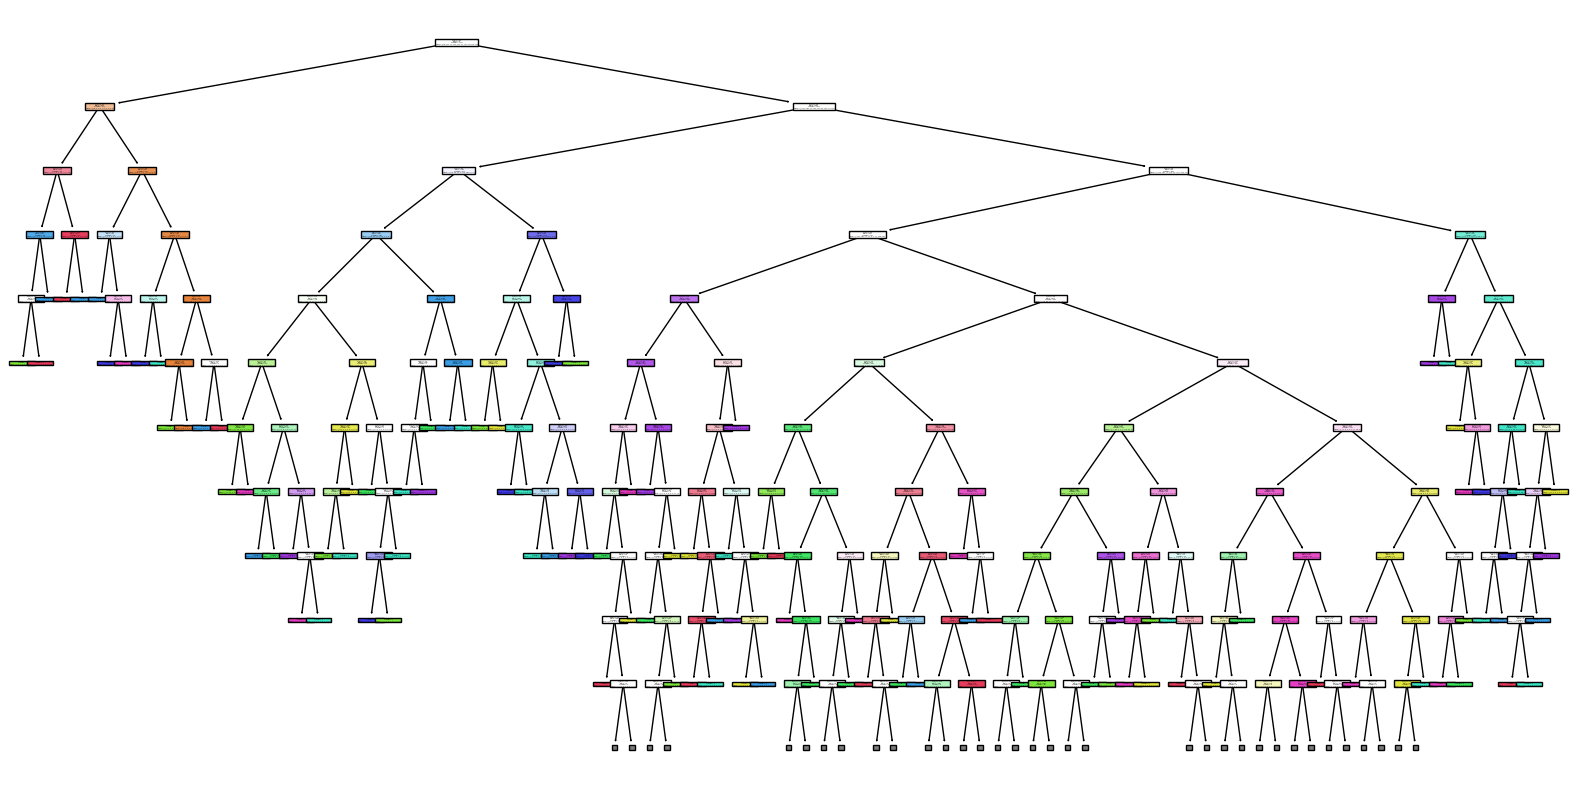

In [67]:
#plotting the tree
plt.figure(figsize=(20,10))
plot_tree(DTC_model, filled= True, max_depth=10)

# Randomforest classifier

Random Forest reduces the risk of overfitting seen in individual decision trees by averaging the results of many trees. It is robust, performs well in a wide variety of datasets, and can handle missing data and noisy features effectively.

Random Forest is a powerful classifier that performs well on a variety of datasets. It is particularly useful when you have many features and need to avoid overfitting. Additionally, its feature importance metric helps identify which features contribute the most to predictions.

In [68]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
clf = RandomForestClassifier(n_estimators=100)

In [70]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = clf.predict(x_test)


In [72]:
from sklearn import metrics

In [73]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100


In [74]:
print("ACCURACY OF THE MODEL:", accuracy)

ACCURACY OF THE MODEL: 97.77777777777777


<Axes: >

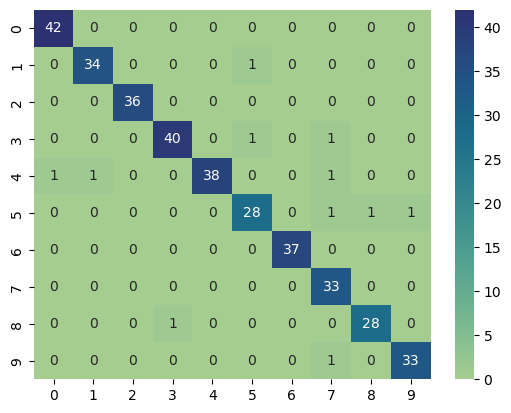

In [75]:
#plotting heatmap
sns.heatmap(cm, annot = True , cmap = "crest")

In [76]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [77]:
feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

feature_names = df.columns[:2]  # Select the first two feature names
X = df[feature_names].values  # Get the 2D feature array
  

X=df[feature_names]


In [78]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=5)

# Trained the model
svm.fit(x_train, y_train)

SVC(C=5, gamma=0.5)

In [79]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=feature_names[0],
        ylabel=feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],  c=y, s=20, edgecolors="k")
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 64 features as input.

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
xtrain,xtest,ytrain,ytest = train_test_split(input, output, random_state=10, test_size=0.2)

In [82]:
# Instace of KNN
KNN = KNeighborsClassifier(n_neighbors=2)

In [83]:
# fitting the data
KNN.fit(xtrain, ytrain)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [84]:
KNN.score(xtest,ytest)

0.6688311688311688

In [85]:
ypred= KNN.predict(xtest)

<Axes: >

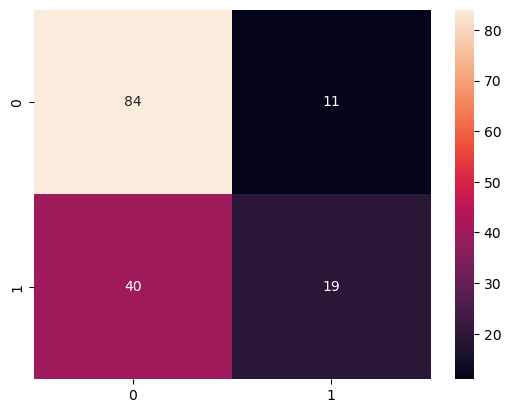

In [86]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score,precision_score

# Instance of confusion metrics
CM = confusion_matrix(ytest, ypred)


# Plotting heatmap
import seaborn as sns 

sns.heatmap(CM, annot= True)

# Naive Bayes

This model predicts the probability of an instance belongs to a class with a given set of feature value. It is a probabilistic classifier.each feature contributes to the predictions with no relation between each other. 

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
#creating model instance
gnb = GaussianNB(var_smoothing = 100000)

In [89]:
#training the model
gnb.fit(xtrain,ytrain)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(var_smoothing=100000)

In [90]:
GaussianNB(var_smoothing = 100000)

GaussianNB(var_smoothing=100000)

In [91]:
#Testing the model
y_pred = gnb.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
print(metrics.classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76       154
           1       0.00      0.00      0.00         0

    accuracy                           0.62       154
   macro avg       0.50      0.31      0.38       154
weighted avg       1.00      0.62      0.76       154



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
gnb.class_count_

array([405., 209.])

In [94]:
gnb.class_prior_

array([0.65960912, 0.34039088])

In [95]:
gnb.classes_

array([0, 1])

In [96]:
gnb.epsilon_

1436468636.5372577

In [97]:
gnb.n_features_in_

8

In [98]:
gnb.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [99]:
gnb.var_

array([[1.43646865e+09, 1.43646935e+09, 1.43646901e+09, 1.43646885e+09,
        1.43647913e+09, 1.43646870e+09, 1.43646864e+09, 1.43646876e+09],
       [1.43646865e+09, 1.43646966e+09, 1.43646906e+09, 1.43646895e+09,
        1.43648971e+09, 1.43646869e+09, 1.43646864e+09, 1.43646876e+09]])

In [100]:
gnb.theta_

array([[  3.28888889, 110.0691358 ,  67.90864198,  19.58518519,
         69.78518519,  30.24814815,   0.42573086,  30.87654321],
       [  4.89473684, 143.26794258,  71.45454545,  23.05741627,
        104.44019139,  34.81004785,   0.53429665,  37.72727273]])

# H-clustering

Hierarchical clustering builds a hierarchy of clusters and is useful for exploring data structure without a predefined number of clusters. However, it may not scale well with large datasets.

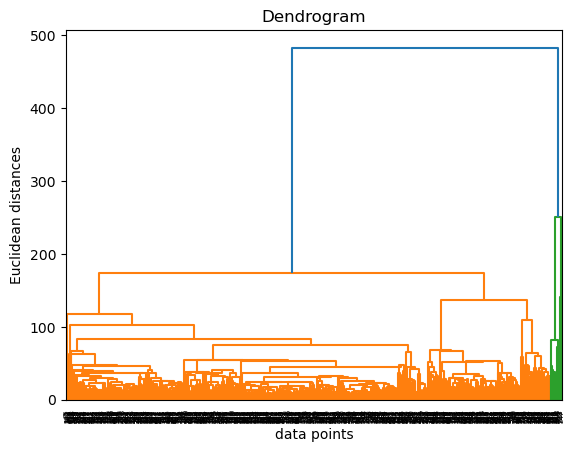

In [101]:
# importing the required module
import scipy.cluster.hierarchy as sch

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(df,
                                        method = "centroid",
                                        metric='euclidean'),
                            orientation = "top")


# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('data points') 
plt.ylabel('Euclidean distances')
plt.show()

# PCA (principal Components Analysis)

PCA helps in reducing the complexity of your dataset while maintaining as much variance as possible. In this case, the first two principal components summarize the data into a 2D representation, making it easier to visualize the underlying structure of the data.

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [103]:
X = df.drop(columns=['Outcome'])  # Drop the target column, adjust column name if needed
y = df['Outcome']  # Outcome as the target
X.columns = X.columns.astype(str)

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA
pca = PCA(n_components=2)  # Reduce the data to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)



Explained variance of each component: [0.34093151 0.16669611]


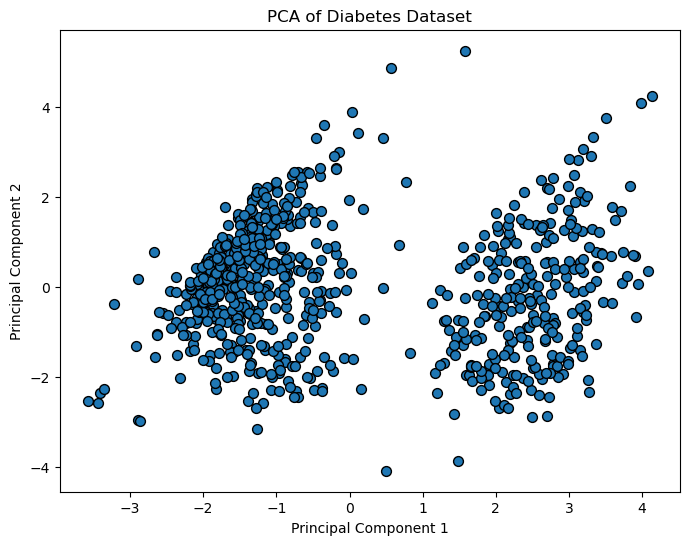

In [104]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance of each component: {explained_variance}')

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolors='k', s=50)
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

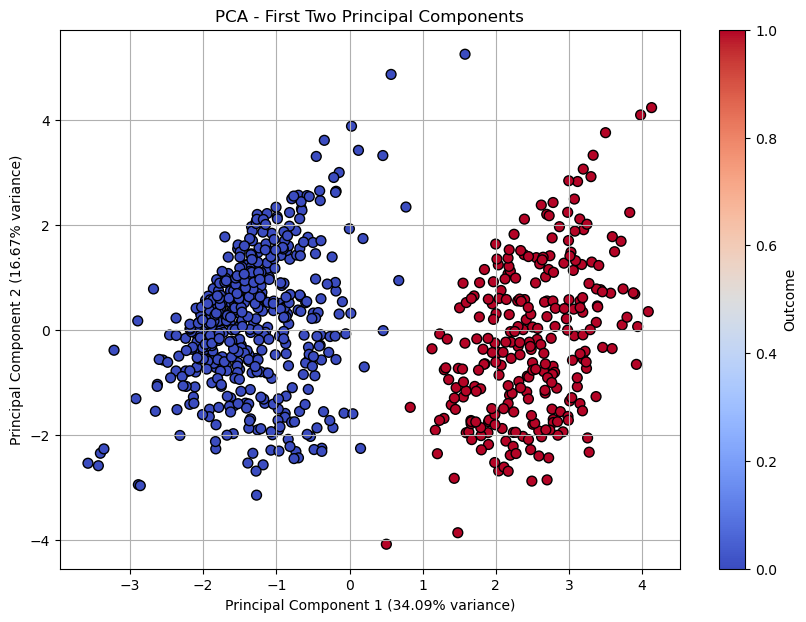

In [105]:
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the PCA result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.title('PCA - First Two Principal Components')
plt.colorbar(scatter, label='Outcome')
plt.grid()
plt.show()

If clear clusters are observed, the data may be suitable for classification tasks (e.g., SVM, k-means clustering), as the groups are well-separated.

If no clear grouping is visible, it might suggest that the dataset is more complex, and further processing or additional components may be required for better classification.
Data Structure:


The PCA plot shows how much of the dataset’s variance can be captured in just two dimensions. A high explained variance suggests that these two components effectively summarize the data. Lower explained variance indicates that more principal components are needed for better accuracy in data representation.

# Objectives

To analyze the distribution of key features such as Glucose, BMI, Age, and Insulin levels to identify patterns, outliers, and correlations with the target variable.
To visualize the relationship between features and the target variable (diabetes outcome).


To apply various machine learning algorithms (Logistic Regression, KNN, SVM, Decision Trees, Random Forest) to classify diabetes risk based on the features.

To evaluate and compare the performance of these models using metrics like accuracy, precision, recall, and F1-score.


To visualize and interpret the decision boundaries of selected models to gain insights into how different features influence diabetes classification.
To identify the most important features contributing to the classification model.

# Conclusion

  Certain features, particularly Glucose levels, BMI, and Age, were found to be significant indicators of diabetes risk. Their    distributions showed that higher glucose levels and BMI are associated with a greater likelihood of diabetes.
Model Performance:

  Various machine learning models were employed, including Logistic Regression, SVM, Decision Trees, and Random Forest. The Random Forest model showed superior performance in accurately classifying diabetes risk, effectively capturing non-linear relationships and interactions between features.

  The visualizations (histograms and box plots) provided clear insights into the distribution of features and helped identify potential outliers and trends.

  Decision boundary plots illustrated how well the models separated the classes based on the selected features.
  
The analysis of the diabetes dataset not only aids in predicting diabetes risk but also contributes to better understanding the key factors involved, ultimately guiding preventive healthcare measures.  